# Predizione della percentuale di rischio di infarto
Il seguente codice, svolge delle operazioni di preprocessing, visualizzazione della distribuzione dei dati e apprendimento supervisionato di alcuni modelli per dati tabellari riguardanti il rischio di infarto. 

Installazione della libreria pandas utilizzata per memorizzare e rappresentare il dataset all'interno del codice

In [93]:
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

# Definizione della funzione read_data
Riceve come input il path dove si trova il file csv e lo restituisce rappresentato in pandas come output

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Riceve il percorso in cui si trova memorizzato il dataset ed estrae i valori
def read_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Definizione della funzione print_data_info

La funzione `print_data_info` riceve come input un dataset rappresentato in pandas e visualizza le seguenti informazioni:

- Numero di righe del dataset
- Numero di colonne del dataset
- Tipo di dato contenuto in ogni colonna del dataset
- Numero di valori nulli per ogni colonna
- Descrizione statistica del dataset
- Valori assunti da ogni feature del dataset (utile per visualizzare eventuali outliers)


In [95]:
# Riceve un dataset e ne stampa alcune informazioni
def print_data_info(data):
    #Informazioni sulle prime 5 righe
    print(data.head()) # restituisce le prime 5 righe del dataset
    # Definizione del numero di righe e colonne
    print("\nNumero totale di righe nel dataset", data.shape[0])
    print("\nNumero totale di colonne nel dataset", data.shape[1])
    print(data.columns)  #  restituisce un elenco dei nomi delle colonne presenti nel DataFrame. Questo è utile per conoscere le colonne disponibili
    
    # tipo di dati di ogni colonna
    print("\nTipo di dati delle colonne")
    print(data.dtypes)

    # numero di valori nulli in ciascuna colonna
    print("\nNumero di valori nulli per colonna")
    print(data.isnull().sum())

    # Visualizza le informazioni sulle colonne del dataset 
    print("\nInformazioni sulle colonne del dataset")
    print(data.info())

    # Visualizza una descrizione statistica del dataset
    print("\nDescrizione statistica del dataset")
    print(data.describe())

    # Valori per ogni feature del dataset
    verify_feature_domain(data)

    return

# Verifica quali sono i valori che vengono assunti per ogni feature del dataset
def verify_feature_domain(data):
    print("\nValori unici per ciascuna feature nel dataset: ")
    for column in data.columns:
        print(f"\n{column}: {data[column].unique()}")
    return


In [96]:
df = read_data("heart.csv")

print('Informazioni sul dataset:')
print_data_info(df)

Informazioni sul dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3    0.23  
1   0     3    0.37  
2   0     3    0.24  
3   1     3    0.28  
4   3     2    0.21  

Numero totale di righe nel dataset 1025

Numero totale di colonne nel dataset 14
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Tipo di dati delle colonne
age           int64
sex           int64
cp            int64
trestbps      int64
chol  

# Definizione della funzione count_per_target_value

Questa funzione riceve in input un dataset e conta il numero di esempi per ogni valore della variabile targetget


In [97]:

def count_per_target_value(data):
    count_per_value = data['target'].value_counts()
    print(count_per_value)
    return

In [98]:
print('\nNumero di esempi per ogni valore assunto dalla feature target:')
count_per_target_value(df)


Numero di esempi per ogni valore assunto dalla feature target:
target
0.78    34
0.83    33
0.80    31
0.86    31
0.85    31
0.89    30
0.82    29
0.84    29
0.88    28
0.75    26
0.72    25
0.39    24
0.73    24
0.87    24
0.26    24
0.77    23
0.74    22
0.81    22
0.71    21
0.14    21
0.79    20
0.20    20
0.36    20
0.32    20
0.12    20
0.16    19
0.23    19
0.76    19
0.37    18
0.27    18
0.35    18
0.17    18
0.18    18
0.28    18
0.38    17
0.13    17
0.33    16
0.30    16
0.25    16
0.21    15
0.24    14
0.40    13
0.22    13
0.11    13
0.90    13
0.29    11
0.70    11
0.31    10
0.10     9
0.19     9
0.15     8
0.34     7
Name: count, dtype: int64


# Verifica dei valori duplicati e rimozione di essi
La funzione `count_duplicates` riceve in input un dataset e conta il numero di righe duplicate. Successivamente, visualizza il numero totale di righe duplicate nel dataset. 
La funzione `delete_duplicates` riceve in input un dataset e rimuove le righe duplicate. Dopo la rimozione dei duplicati, viene visualizzato il numero totale di righe nel dataset. La rimozione dei duplicati è utile per garantire l'integrità e la coerenza dei dati, eliminando le righe ripetute che potrebbero influenzare analisi e modellazione.


In [99]:
def count_duplicates(data):
    numero_righe_duplicate = data.duplicated().sum()
    print("\nNumero di righe duplicate: ", numero_righe_duplicate)
    return

def delete_duplicates(data):
    data.drop_duplicates(inplace=True)
    print('A seguito della rimozione dei duplicati il dataset possiede', data.shape[0], 'righe')
    return data

In [100]:
count_duplicates(df)
df = delete_duplicates(df)


Numero di righe duplicate:  55
A seguito della rimozione dei duplicati il dataset possiede 970 righe


# Visualizzazione grafica della distribuzione delle feature
E' possibile visualizzare graficamente la distribuzione dei valori assunti da ogni feature.

Lungo l'asse x verrà visualizzato il nome della feature con i rispettivi valori in un certo range.

Lugo l'asse delle y verrà visualizzato il numero di campioni (esempi) che assumono un valore.

Ad esempio per le feature age e restecg:

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


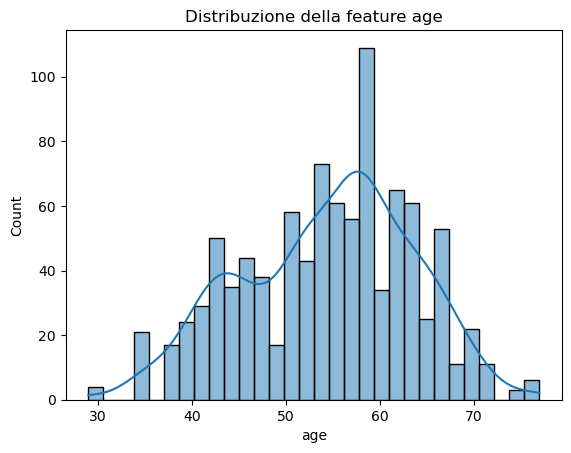

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


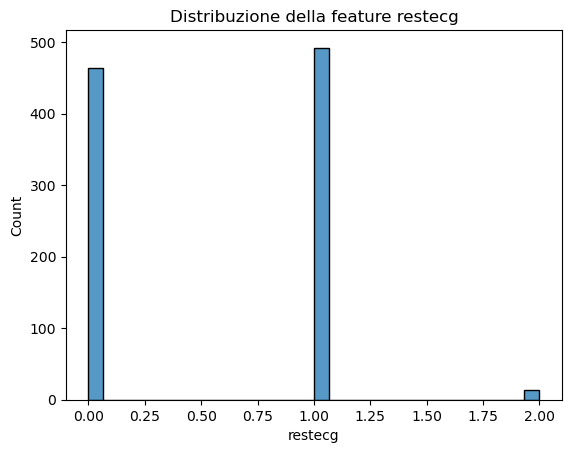

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df, x='age', kde=True, bins=30)
plt.title("Distribuzione della feature age")
plt.savefig("graphImage/distribution/"+"age_distribution.png")
plt.show()

sns.histplot(data=df, x='restecg', kde=False, bins=30)
plt.title("Distribuzione della feature restecg")
plt.savefig("graphImage/distribution/"+"restecg_distribution.png")
plt.show()

# Visualizzazione della distribuzione del target e della matrice di correlazione
La funzione `target_distribution_graph` riceve come input il dataset e crea un grafico per visualizzare la distribuzione dei valori assunti dalla feature target.

La funzione `correlation_graph` riceve come input il dataset e crea una mtrice di correlazione. E' molto utile per comprendere come come sono correlate le features. Feature strettamente correlate potrebbero compromettere le prestazioni dei modelli di apprendimento e potrebbero essere eliminate.

In [102]:

# Creazione di un grafico per visualizzare la distribuzione del target
def target_distribution__graph(data):
    # Conta il numero di esempi per ciascuna classe del target
    count_per_class = data['target'].value_counts()
    # Ordina le classi per valore di conteggio
    count_per_class = count_per_class.sort_index()
    # Visualizza la distribuzione del target rispetto al numero di esempi
    plt.figure(figsize=(12, 8))
    count_per_class.plot(kind='bar', color='skyblue')
    plt.title('Distribuzione del target rispetto al numero di esempi nel training set')
    plt.xlabel('Target')
    plt.ylabel('Numero di esempi')
    plt.tight_layout()  # Imposta il layout in modo che le etichette non si sovrappongano
    plt.savefig("graphImage/distribution/"+"target_distribution.png")
    plt.close()
   

import seaborn as sns
import matplotlib.pyplot as plt

def correlationGraph(data):
    matrice_correlazione = data.corr()
    
    # Visualizzazione della matrice di correlazione completa
    plt.figure(figsize=(12, 12))
    sns.heatmap(matrice_correlazione, annot=False, cmap='coolwarm', fmt=".2f")
    plt.title("Matrice di Correlazione Completa")
    plt.xlabel("Feature")
    plt.ylabel("Feature")
    plt.savefig("graphImage/correlation/correlationGraph.png")
    plt.close()

    # Creazione della matrice di correlazione formata solo dalle features altamente correlate
    # Seleziona solo i valori di correlazione superiori a 0.4 o inferiori a -0.4
    mask = (matrice_correlazione >= 0.4) | (matrice_correlazione <= -0.4)
    corr_matrix = matrice_correlazione[mask]
    
    # Visualizzazione della matrice di correlazione delle feature altamente correlate
    plt.figure(figsize=(12, 12))
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
    plt.title("Matrice di Feature più Correlate")
    plt.xlabel("Feature")
    plt.ylabel("Feature")
    plt.savefig("graphImage/correlation/FeatureHighCorrelationGraph.png")
    plt.close()



In [103]:
print('\nGrafico di distribuzione della feature target memorizzato in: graphImage/distribution')
target_distribution__graph(df)

print('\nMatrici di correlazione memorizzate in: graphImage/correlation')
correlationGraph(df)


Grafico di distribuzione della feature target memorizzato in: graphImage/distribution

Matrici di correlazione memorizzate in: graphImage/correlation


# Suddivisione del dataset in train e test
La funzione `splid_data` riceve come input il dataset e lo suddivide in train e test. Rispettivamente:
- X_train e y_ train: usati per la fase di addestramento del modello;
- X_test e y_test: usati per la fese di valutazione del modello. X_test verrà passato al modello addestrato per ottenere le previsioni, e queste previsioni verranno quindi confrontate con i valori reali contenuti in y_test.

In [104]:
def split_data(data):
    X = data.drop("target", axis=1)
    Y = data["target"]

    #Random state 42 viene usato per riproducibilità dei risultati
    #test_size=0.2 indica che il 20% del dataset verrà utilizzato per il test set e la restante parte per il training set.
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    return X_train, y_train, X_test, y_test

In [105]:
X_train, y_train, X_test, y_test = split_data(df)

# Standardizzaione delle feature numeriche
Avendo identificato delle feature numercihe nel dataset, con il fine di ottnere risultati migliori per i modelli di addestramento viene applicata la normalizzazione standard scaler. In questo modo le feature avranno valori in una 'scala simile'. 
Viene calcolata come `x-y/z` dove:
- x è il valore assunto dalla feature
- y è la media dei valori della feature
- z è la deviazione standard dei valori della feature

In [106]:
def standard_scaler_normalization(X_train, X_test):

    # Specifica le colonne da standardizzare
    feature_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
    scaler = StandardScaler()
    
    scaler.fit(X_train[feature_col])
    
    X_train[feature_col] = scaler.transform(X_train[feature_col])
    X_test[feature_col] = scaler.transform(X_test[feature_col])
    
    return X_train, X_test

In [107]:
X_train, X_test = standard_scaler_normalization(X_train, X_test)

# Modelli di apprendimento supervisionato
Sono stati scelti i seguenti modelli di apprendimento supervisionato:
- Knn
- Regressione lineare
- Gradient boosting
- Random forest
- SVR

Lo scopo è quello di confrontare i risultati ottenuti da questi modelli sulla base di 3 metriche:
- R2: il coefficiente di determinazione può avere un valore che varia tra 0 e 1. 1 indica una perfetta corrispondenza tra le previsioni del modello e i dati osservati, mentre valori più bassi indicano una minore capacità del modello di spiegare la variabilità dei dati.
- MAE: l'errore medio assoluto è una metrica utilizzata per valutare la precisione di un modello di regressione. Calcola la media delle differenze assolute tra ciascuna previsione del modello e il valore reale corrispondente. Un valore più basso di MAE indica una maggiore precisione del modello, poiché indica una deviazione minore tra le previsioni del modello e i dati osservati.
- MSE: l'errore quadratico medio calcola la media delle differenze quadrate tra ciascuna previsione del modello e il valore reale corrispondente. Un valore più basso di MSE indica una migliore precisione del modello, poiché indica una deviazione minore tra le previsioni del modello e i dati osservati.

I modelli verranno applicati:
- senza cross validation e iperparametri
- con cross validation ed alcuni iperparametri (utilizzando grid search, verrà definito il miglior valore per ogni iperparametro scelto)

Il procedimento verrà effettuato sia sul training set che sul test set. Questo è molto ultile per valutare se i modelli sono affetti da overfitting. Metriche troppo elevate (ad esempio per R2, troppo vicine ad 1 oppure direttamente 1.0) per il training set e invece piuttosto basse sul test set potrebbero indicare presenza di overfitting.

I risultati verranno infine confrontati, per determinare qual è il modello migliore per prendire la percentuale di rischio d'infarto.

# Definizione della funzione di valutazione
La funzione `evaluation_metrics` viene utilizzata da tutti i modelli per il calcolo delle 3 metriche definite. Riceve come input il nome del modello epr il quale si stanno calcolando le metriche, y_test ovvero i valori effettivi della feature target, y_pred i valori predetti per il target dal corrente modello.

In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluation_metrics(model_name, y_test, y_pred):
    mse = round(mean_squared_error(y_test, y_pred), 4)
    mae = round(mean_absolute_error(y_test, y_pred), 4)
    r2 = round(r2_score(y_test, y_pred), 4)
    
    results = {
        'Model' : model_name,
        'MSE' : mse,
        'MAE' : mae,
        'R2' : r2
    }
    
    return results

# Decision Tree
Vengono definite due funzioni per il modello del decision tree. 

La prima è `decision_tree` la quale riceve come input X_train, X_test, y_train e y_test; addestra un modello decision tree senza iperparametri e cross validation e calcola i risultati delle metriche di valutazione.

La seconda è `decision_tree_cv` la quale addestra un modello decision tree avendo stabilito alcuni iperparametri da utilizzare:

- criterion: determina la funzione di misura della qualità della divisione in ciascun nodo dell'albero. I valori comuni per criterion sono "gini" per il criterio di Gini e "entropy" per l'entropia. Il criterio di Gini misura la purezza delle divisioni, mentre l'entropia misura l'impurità delle divisioni. Il criterio viene utilizzato per valutare quale divisione fornirà il maggior guadagno informativo.

- splitter: specifica la strategia utilizzata per selezionare la divisione in ciascun nodo dell'albero. I valori comuni per splitter sono "best" e "random". "Best" seleziona la migliore divisione tra tutte le possibili divisioni, mentre "random" seleziona casualmente una divisione tra quelle valide.

- max_depth: controlla la massima profondità dell'albero. Limitare la profondità dell'albero può aiutare a prevenire l'overfitting. Un valore più alto di max_depth consente all'albero di imparare relazioni più complesse nei dati, ma può aumentare il rischio di overfitting.

- min_samples_leaf: specifica il numero minimo di campioni richiesti in una foglia. Limitare il numero minimo di campioni in una foglia può aiutare a regolarizzare l'albero e prevenire l'overfitting. Un valore più alto di min_samples_leaf porta a foglie più grandi e può aiutare a generare modelli più generalizzabili.

- min_samples_split: specifica il numero minimo di campioni richiesti per dividere un nodo interno. Limitare il numero minimo di campioni richiesti per dividere un nodo può aiutare a regolarizzare l'albero e prevenire l'overfitting. Un valore più alto di min_samples_split limita la complessità dell'albero e può produrre modelli più generalizzabili.

Utilizza `grid_search` con la quale ricerca la miglior configurazione di iperparametri da utilizzare, applicando la k fold cross validation con 5 fold per trovare il partizionamento migliore.

Infine calcola i risultati delle metriche di valutazione.

In [109]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def decision_tree(X_train, y_train, X_test, y_test):
    dt = DecisionTreeRegressor(random_state=42)
    dt.fit(X_train, y_train)
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)
    result_train = evaluation_metrics("Decision tree (Train)", y_train, y_train_pred)
    result_test = evaluation_metrics("Decision tree (Test)", y_test, y_test_pred)
    return result_train, result_test

def decision_tree_cv(X_train, y_train, X_test, y_test):
    # CROSS VALIDATION
    # iperparametri da testare
    param_grid = {
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    dt_cv = DecisionTreeRegressor(random_state=42)
    grid_search = GridSearchCV(dt_cv, param_grid, cv=5, n_jobs=-1, scoring='r2')
    grid_search.fit(X_train, y_train)
    y_train_pred = grid_search.predict(X_train)
    y_test_pred = grid_search.predict(X_test)
    print("Best Parameters Decision Tree:", grid_search.best_params_)
    result_train = evaluation_metrics("Decision tree ottimizzato (Train)", y_train, y_train_pred)
    result_test = evaluation_metrics("Decision tree ottimizzato (Test)", y_test, y_test_pred)
    return result_train, result_test


# Gradient Boosting
Vengono definite due funzioni per il modello del Gradient Boosting. 

La prima è `gradient_boosting` la quale riceve come input X_train, X_test, y_train e y_test; addestra un modello gradient boosting senza iperparametri e cross validation e calcola i risultati delle metriche di valutazione.

La seconda è `gradient_boosting_cv` la quale addestra un modello di gradient boosting avendo stabilito alcuni iperparametri da utilizzare:

- learning_rate: determina il passo con cui il modello corregge gli errori di predizione in ogni iterazione. Un valore più basso del learning_rate richiede un numero maggiore di alberi (n_estimators) per convergere, ma può portare a una maggiore precisione riducendo il rischio di overfitting. Valori comuni sono 0.01, 0.1, 0.2.
- max_depth: controlla la profondità massima di ciascun albero. Un valore più alto di max_depth consente agli alberi di apprendere modelli più complessi, ma aumenta anche il rischio di overfitting. Valori comuni per max_depth sono 3, 5, 7.
- n_estimators: rappresenta il numero totale di alberi nel modello. Un numero maggiore di alberi può migliorare la performance del modello, ma aumenta anche il tempo di addestramento e il rischio di overfitting. Valori comuni sono 100, 200, 300.

Utilizza `grid_search` con la quale ricerca la miglior configurazione di iperparametri da utilizzare, applicando la k fold cross validation con 5 fold per trovare il partizionamento migliore. Infine calcola i risultati delle metriche di valutazione.

In [110]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

def gradient_boosting(X_train, y_train, X_test, y_test):
    gb = GradientBoostingRegressor(random_state=42)
    gb.fit(X_train, y_train)
    y_train_pred = gb.predict(X_train)
    y_test_pred = gb.predict(X_test)
    result_train = evaluation_metrics("Gradient boosting (Train)", y_train, y_train_pred)
    result_test = evaluation_metrics("Gradient boosting  (Test)", y_test, y_test_pred)
    return result_train, result_test

def gradient_boosting_cv(X_train, y_train, X_test, y_test):
    # CROSS VALIDATION
    # iperparametri da testare
    param_grid = {
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7],
            'n_estimators': [100, 200, 300]
    }
    gb_cv = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(gb_cv, param_grid, cv=5, n_jobs=-1, scoring='r2')
    grid_search.fit(X_train, y_train)
    y_train_pred = grid_search.predict(X_train)
    y_test_pred = grid_search.predict(X_test)
    print("Best Parameters Gradient Boosting:", grid_search.best_params_)
    result_train = evaluation_metrics("Gradient boosting  ottimizzato (Train)", y_train, y_train_pred)
    result_test = evaluation_metrics("Gradient boosting  ottimizzato (Test)", y_test, y_test_pred)
    return result_train, result_test

# K-nearest-neighbors
Vengono definite due funzioni per il modello del knn. 

La prima è `knn` la quale riceve come input X_train, X_test, y_train e y_test; addestra un modello knn senza iperparametri e cross validation e calcola i risultati delle metriche di valutazione.

La seconda è `knn_cv` la quale addestra un modello di gradient boosting avendo stabilito alcuni iperparametri da utilizzare:
- n_neighbors: determina il numero di vicini considerati per fare una predizione. In pratica, specifica quanti punti di dati circostanti devono essere presi in considerazione per determinare la classe (per la classificazione) o il valore (per la regressione) di un punto di dati. Valori comuni sono 3, 5, 7, 9.
- algorithm: specifica l'algoritmo usato per trovare i punti vicini. Le opzioni disponibili sono:
    - cia che l'algorio scelga il metodo migliore in base ai valori passati.
    - 'ball_tree': utilizza una struttura di dati ad albero di sfere (ball tree) per cercare i vicini.
    - 'kd_tree': utilizza una struttura di dati ad albero k-dimensionale (k-d tree) per cercare i vicini.
    - 'brute': utilizza una ricerca esaustiva o forza bruta per cercare i vicini.
- leaf_size: specifica la dimensione delle foglie passate agli algoritmi 'ball_tree' e 'kd_tree'. È il numero minimo di punti di dati che può essere contenuto in una foglia. Valori comuni sono 20, 30, 40, 50. Una dimensione delle foglie più piccola può aumentare la complessità e il tempo di calcolo, mentre una dimensione più grande può ridurla.

Utilizza `grid_search` con la quale ricerca la miglior configurazione di iperparametri da utilizzare, applicando la k fold cross validation con 5 fold per trovare il partizionamento migliore. Infine calcola i risultati delle metriche di valutazione.

In [111]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

def knn(X_train, y_train, X_test, y_test):
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    result_train = evaluation_metrics("Knn (Train)", y_train, y_train_pred)
    result_test = evaluation_metrics("Knn (Test)", y_test, y_test_pred)
    return result_train, result_test

def knn_cv(X_train, y_train, X_test, y_test):
    # CROSS VALIDATION
    # iperparametri da testare
    param_grid = {
            'n_neighbors': [3, 5, 7, 9],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size': [20, 30, 40, 50]
    }
    knn_cv = KNeighborsRegressor()
    grid_search = GridSearchCV(knn_cv, param_grid, cv=5, n_jobs=-1, scoring='r2')
    grid_search.fit(X_train, y_train)
    y_train_pred = grid_search.predict(X_train)
    y_test_pred = grid_search.predict(X_test)
    print("Best Parameters KNN:", grid_search.best_params_)
    result_train = evaluation_metrics("Knn ottimizzato (Train)", y_train, y_train_pred)
    result_test = evaluation_metrics("Knn ottimizzato (Test)", y_test, y_test_pred)
    return result_train, result_test




# Linear Regression
Viene definita una sola funziione per la regressione lineare. 

La funzione è `linear_regression` la quale riceve come input X_train, X_test, y_train e y_test; addestra un modello di regressione lineare senza iperparametri e cross validation e calcola i risultati delle metriche di valutazione. La regressione lineare viene solitamente utilizzata senza iperparametri.



In [112]:
import numpy as np
from sklearn.linear_model import LinearRegression

def linear_regression(X_train, y_train, X_test, y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    result_train = evaluation_metrics("Linear regression (Train)", y_train, y_train_pred)
    result_test = evaluation_metrics("Linear regression (Test)", y_test, y_test_pred)
    return result_train, result_test

# Random Forest
Vengono definite due funzioni per il modello del random forest. 

La prima è `random_forest` la quale riceve come input X_train, X_test, y_train e y_test; addestra un modello di random forest senza iperparametri e cross validation e calcola i risultati delle metriche di valutazione.

La seconda è `random_forest_cv` la quale addestra un modello di random forest avendo stabilito alcuni iperparametri da utilizzare:
- n_estimators: determina il numero di alberi nella foresta. Un numero maggiore di alberi può migliorare la performance del modello riducendo la varianza, ma aumenta anche il tempo di allenamento e il consumo di memoria. Valori comuni sono 50, 100, 200.
- max_depth: controlla la profondità massima di ciascun albero. Un valore più alto o impostato a None permette agli alberi di espandersi fino a quando tutte le foglie contengono meno di min_samples_split campioni. Alberi molto profondi possono apprendere relazioni molto complesse ma rischiano di overfitting. Valori comuni sono None (nessun limite), 10, 20, 30.
- min_samples_split: specifica il numero minimo di campioni richiesti per dividere un nodo interno. Un valore più alto limita la crescita degli alberi, riducendo il rischio di overfitting ma anche la capacità del modello di adattarsi ai dati. Valori comuni sono 2, 5, 10.
- min_samples_leaf: determina il numero minimo di campioni che deve essere presenti in una foglia. Un valore più alto può ridurre la varianza e prevenire l'overfitting. Valori comuni sono 1, 2, 4.

Utilizza `grid_search` con la quale ricerca la miglior configurazione di iperparametri da utilizzare, applicando la k fold cross validation con 5 fold per trovare il partizionamento migliore. Infine calcola i risultati delle metriche di valutazione.

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

def random_forest(X_train, y_train, X_test, y_test):
    rf = RandomForestRegressor(random_state=42)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    result_train = evaluation_metrics("Random forest (Train)", y_train, y_train_pred)
    result_test = evaluation_metrics("Random forest (Test)", y_test, y_test_pred)
    return result_train, result_test

def random_forest_cv(X_train, y_train, X_test, y_test):
    # CROSS VALIDATION
    # iperparametri da testare
    param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
    }
    rf_cv = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(rf_cv, param_grid, cv=5, n_jobs=-1, scoring='r2')
    grid_search.fit(X_train, y_train)
    y_train_pred = grid_search.predict(X_train)
    y_test_pred = grid_search.predict(X_test)
    print("Best Parameters Random Forest:", grid_search.best_params_)
    result_train = evaluation_metrics("Random forest ottimizzato (Train)", y_train, y_train_pred)
    result_test = evaluation_metrics("Random forest ottimizzato (Test)", y_test, y_test_pred)
    return result_train, result_test


# Suptor vector regression
Vengono definite due funzioni per il modello SVR. 

La prima è `svr` la quale riceve come input X_train, X_test, y_train e y_test; addestra un modello di svr senza iperparametri e cross validation e calcola i risultati delle metriche di valutazione.

La seconda è `svr_cv` la quale addestra un modello di svr avendo stabilito alcuni iperparametri da utilizzare:
- kernel: specifica il tipo di funzione kernel da utilizzare per trasformare i dati in uno spazio di dimensioni superiori, dove è possibile applicare la separazione lineare. I kernel comuni sono:
  - linear: Utilizza un kernel lineare.
  - rbf: Utilizza un kernel a base radiale (Radial Basis Function), che è particolarmente utile per problemi non lineari.
  - C: controlla il compromesso tra la larghezza della fascia di margine e gli errori di di regressione dei punti di dati. Un valore alto di C cerca di
    classificare tutti i punti di dati correttamente, anche se ciò significa che il margine sarà più stretto, aumentando il rischio di overfitting.
    Valori comuni sono 0.1, 1, 10.
- gamma: è specifico del kernel RBF e determina l'influenza di un singolo esempio di addestramento. Un valore basso di gamma significa che ogni punto
di dati ha un'ampia area di influenza, portando a un modello più liscio. Un valore alto di gamma significa che ogni punto di dati ha un'area di influenza ristretta, portando a un modello più complesso. I valori comuni sono:
    - scale: Utilizza 1 / (n_features * X.var()) come valore di gamma.
    - auto: Utilizza 1 / n_features.
- epsilon: specifica la fascia all'interno della quale non viene penalizzato l'errore nella funzione di perdita (loss) dell'SVR. Controlla la tolleranza all'errore del modello SVR. Un valore di epsilon più alto ignora gli errori più piccoli, rendendo il modello meno sensibile ai piccoli cambiamenti nei dati. Valori comuni sono 0.01, 0.1.

Utilizza `grid_search` con la quale ricerca la miglior configurazione di iperparametri da utilizzare, applicando la k fold cross validation con 5 fold per trovare il partizionamento migliore. Infine calcola i risultati delle metriche di valutazione.

In [114]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

def svr(X_train, y_train, X_test, y_test):
    svr = SVR()
    svr.fit(X_train, y_train)
    y_train_pred = svr.predict(X_train)
    y_test_pred = svr.predict(X_test)
    result_train = evaluation_metrics("SVR (Train)", y_train, y_train_pred)
    result_test = evaluation_metrics("SVR (Test)", y_test, y_test_pred)
    return result_train, result_test

def svr_cv(X_train, y_train, X_test, y_test):
    # CROSS VALIDATION
    # iperparametri da testare
    param_grid = {
            'kernel': ['linear', 'rbf'], 
            'C': [0.1, 1, 10],  
            'gamma': ['scale', 'auto'],
            'epsilon': [0.01, 0.1] 
    }
    svr_cv = SVR()
    grid_search = GridSearchCV(svr_cv, param_grid, cv=5, n_jobs=-1, scoring='r2')
    grid_search.fit(X_train, y_train)
    y_train_pred = grid_search.predict(X_train)
    y_test_pred = grid_search.predict(X_test)
    print("Best Parameters SVR:", grid_search.best_params_)
    result_train = evaluation_metrics("SVR ottimizzato (Train)", y_train, y_train_pred)
    result_test = evaluation_metrics("SVR ottimizzato (Test)", y_test, y_test_pred)
    return result_train, result_test

Utilizzo dei modelli di apprendimento supervisionato e stampa dei risultati.

In [115]:

results = []

# DECISION TREE
rs_dt_train, rs_dt_test = decision_tree(X_train, y_train, X_test, y_test)
results.extend([rs_dt_train, rs_dt_test])

rs_dt_ott_train, rs_dt_ott_test = decision_tree_cv(X_train, y_train, X_test, y_test)
results.extend([rs_dt_ott_train, rs_dt_ott_test])

# Gradient boosting
rs_gb_train, rs_gb_test = gradient_boosting(X_train, y_train, X_test, y_test)
results.extend([rs_gb_train, rs_gb_test])

rs_gb_ott_train, rs_gb_ott_test = gradient_boosting_cv(X_train, y_train, X_test, y_test)
results.extend([rs_gb_ott_train, rs_gb_ott_test])

# Linear regression
rs_lr_train, rs_lr_test = linear_regression(X_train, y_train, X_test, y_test)
results.extend([rs_lr_train, rs_lr_test])

# knn
rs_knn_train, rs_knn_test = knn(X_train, y_train, X_test, y_test)
results.extend([rs_knn_train, rs_knn_test])

rs_knn_ott_train, rs_knn_ott_test = knn_cv(X_train, y_train, X_test, y_test)
results.extend([rs_knn_ott_train, rs_knn_ott_test])

# Random forest
rs_rf_train, rs_rf_test = random_forest(X_train, y_train, X_test, y_test)
results.extend([rs_rf_train, rs_rf_test])

# Svr
rs_rf_ott_train, rs_rf_ott_test = random_forest_cv(X_train, y_train, X_test, y_test)
results.extend([rs_rf_ott_train, rs_rf_ott_test])

rs_svr_train, rs_svr_test = svr(X_train, y_train, X_test, y_test)
results.extend([rs_svr_train, rs_svr_test])

rs_svr_ott_train, rs_svr_ott_test = svr_cv(X_train, y_train, X_test, y_test)
results.extend([rs_svr_ott_train, rs_svr_ott_test])

df_results = pd.DataFrame(results)
print(df_results)


Best Parameters Decision Tree: {'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best Parameters Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300}
Best Parameters KNN: {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 3}
Best Parameters Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Parameters SVR: {'C': 10, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
                                     Model     MSE     MAE      R2
0                    Decision tree (Train)  0.0038  0.0491  0.9536
1                     Decision tree (Test)  0.0079  0.0738  0.9039
2        Decision tree ottimizzato (Train)  0.0062  0.0584  0.9239
3         Decision tree ottimizzato (Test)  0.0095  0.0762  0.8842
4                Gradient boosting (Train)  0.0149  0.0950  0.8169
5                Gradient boosting  (Test)  0.0217  0.1125  0.7349
6   Gradient